## 作业4：使用蜂群算法优化Restrigr函数
2112105068 韦青茂

Rastrigr函数的实现：

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def Rastrigr(x):
    # 检查输入是否为 numpy-array 
    if not isinstance(x, np.ndarray): 
        x = np.asarray(x)   
    return np.sum(np.square(x) - 10 * np.cos(2 * np.pi  * x) + 10, axis=-1)

def randomF(low, up, shape): # 生成随机浮点数
    return np.random.ranf(shape)*(up-low)+low
plt.rcParams['font.family']=['simhei']
plt.rcParams['axes.unicode_minus'] = True

In [4]:
LB, UB = -5.12, 5.12                # 输入变量的取值范围
N_DIM = 30                          # 输入变量的维度
POP = 50 # 种群规模
L = 10 # 停滞界限
# POPf  = 30 # 觅食蜂种群规模
# POPo = POP-POPf # 观察蜂种群规模
MAX_ITER = 2000
Y_history = [[] for _ in range(MAX_ITER)]


for _ in range(20):  
    # 初始解
    x = (UB-LB)*np.random.rand(POP, N_DIM)-UB
    y = Rastrigr(x) 
    bestX = x[np.argmin(y)]
    bestY = np.min(y)
    mine = np.zeros(POP)
    for iter in range(MAX_ITER):
        Y_history[iter].append(bestY)
        # ==觅食蜂阶段==
        for i in range(POP):
            k = i
            while k == i:
                k = np.random.randint(0, POP)
            phi = 2*np.random.rand() - 1
            newX = x[i] + phi*(x[i]-x[k])
            newY = Rastrigr(newX)
            if newY < y[i]:
                x[i] = newX
                y[i] = newY
            else:
                mine[i] += 1
        
        # ==观察蜂阶段==
        # 计算选择概率
        probability = np.exp(-y/np.mean(y))
        probability = probability/np.sum(probability)
        for i in range(POP):
            idx = np.random.choice(POP, p=probability)
            k = i
            while k == i:
                k = np.random.randint(0, POP)
            phi = 2*np.random.rand() - 1
            newX = x[idx] + phi*(x[idx]-x[k])
            newY = Rastrigr(newX)
            if newY < y[idx]:
                x[idx] = newX
                y[idx] = newY
                mine[idx] = 0
            else:
                mine[idx] += 1

        # ==侦查蜂阶段==
        for i in range(POP):
            if mine[i] >= L:
                x[i] = (UB-LB)*np.random.rand(1, N_DIM)-UB
                y[i] = Rastrigr(x[i])
                mine[i] = 0
                # print("hello")
        
        _bestX = x[np.argmin(y)]
        _bestY = np.min(y)
        if _bestY < bestY:
            bestY = _bestY
            bestX = _bestX



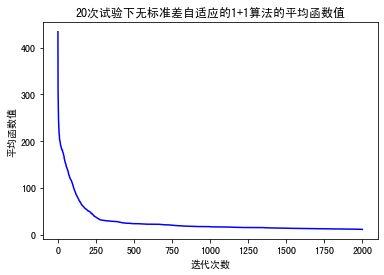

In [6]:
# 画出曲线
idx = np.arange(MAX_ITER)
avgY = [np.average(i) for i in Y_history]
figure = plt.plot(idx, avgY,  color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均函数值")
plt.title("20次试验下无标准差自适应的1+1算法的平均函数值")
plt.show()